<a href="https://colab.research.google.com/github/Arpitsinghvampire/machine_learning/blob/main/Concrete_fissures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
%pip install skillsnetwork


In [9]:
#first we import the dependencies

import os

import numpy as np

import matplotlib.pyplot as plt

import skillsnetwork

from PIL import Image

In [10]:
#now we need to download the data

#the data is placed on the server which is from where it
#is retrieved for this we use the skillnetwork.prepare

await skillsnetwork.prepare("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/concrete_crack_images_for_classification.zip", overwrite=True)

  0%|          | 0/40000 [00:00<?, ?it/s]

Saved to '.'


In [5]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [11]:
#now after bringing the data from the server , we would need to load the data

negative_files = os.scandir('./Negative')
negative_files

positive_files=os.scandir('./Positive')
positive_files


In [12]:
#now lets check the contents of the folder
#we need to take the first file in the directory
#grab the first file in the directory

filename=next(negative_files)
filename

<DirEntry '06386.jpg'>

In [13]:
#we only need to read the element which is a file
os.path.isfile(filename)

True

In [14]:
#we now get the image name
image_name=str(filename).split("'")[1]
image_name

'06386.jpg'

(227, 227, 3)


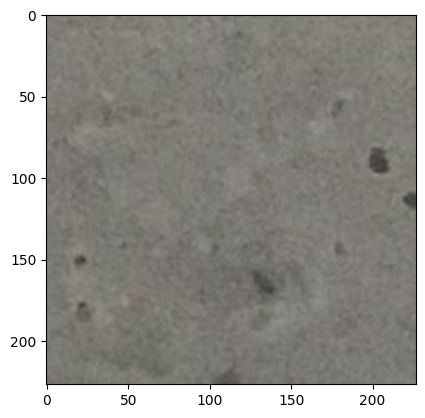

In [15]:
#now after getting the image nam e, we read the image
import cv2

image_data=plt.imread("./Negative/07356.jpg")
print(image_data.shape)
plt.imshow(image_data)


In [16]:
#now first lets store all the positive and the neegative instances
import numpy as np
negative_images=[]
for file_name in negative_files:
  if os.path.isfile(file_name):
    image_name=str(file_name).split("'")[1]
    negative_images.append(image_name)
#here we get all the negative images in  the list
#we would now store them inside the np array

negative_images=np.asarray(negative_images)


In [17]:
#similarly we do for the positive images

positive_images=[]

for file_name in positive_files:
  if os.path.isfile(file_name): #here we basically check whether it is a file oor not
    image_name=str(file_name).split("'")[1]
    positive_images.append(image_name)

#now we typecast into the numpy array
positive_images=np.asarray(positive_images)


05431.jpg


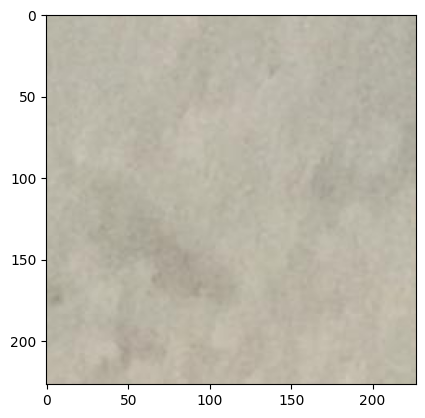

06386.jpg


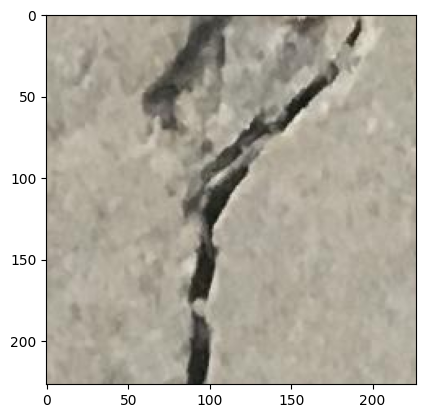

03047.jpg


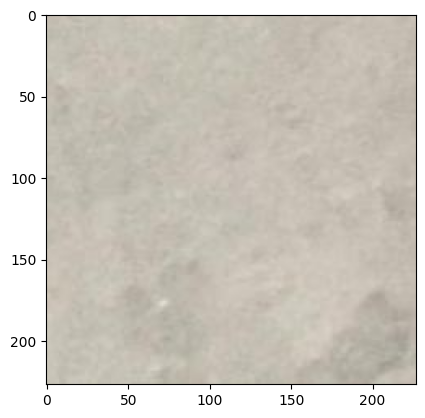

17414_1.jpg


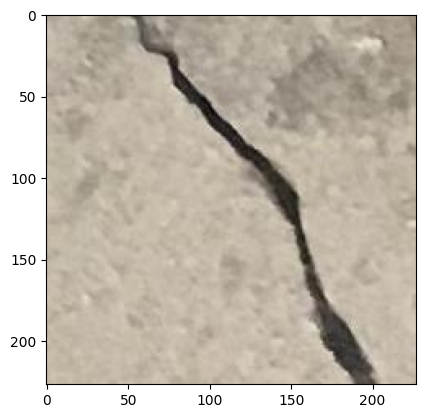

16748.jpg


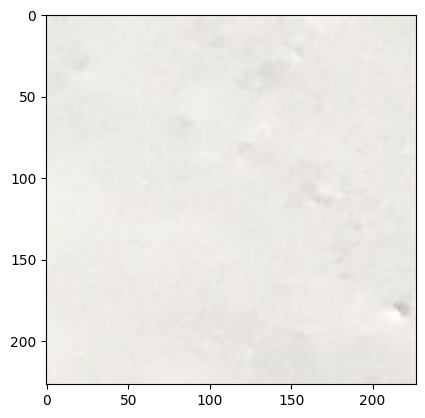

05431.jpg


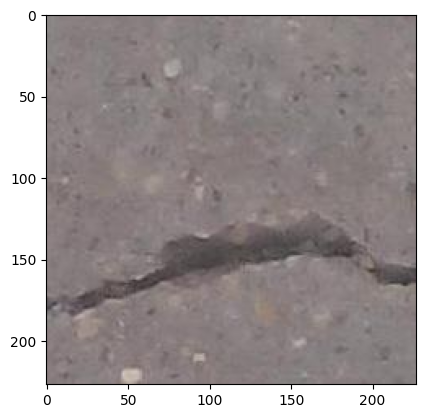

00216.jpg


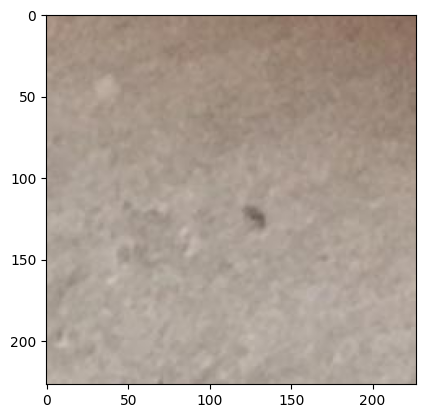

03047.jpg


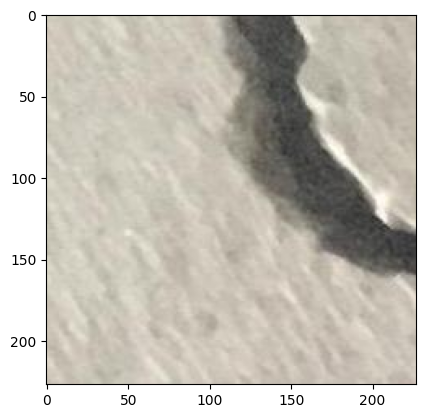

17910.jpg


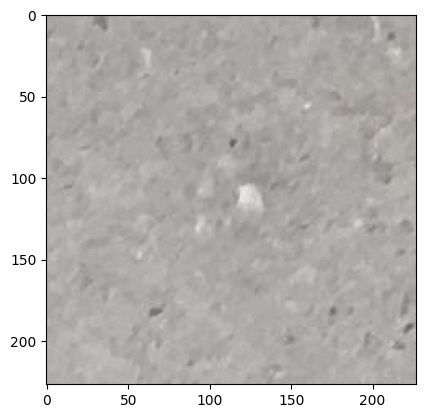

14988_1.jpg


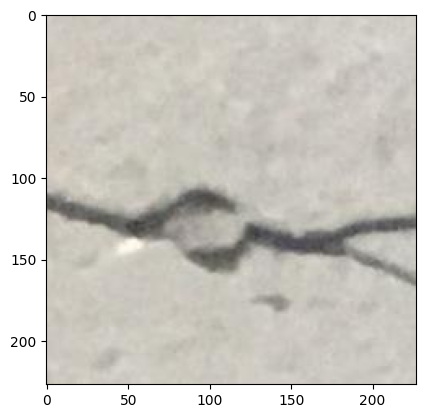

In [18]:
#lets print the negative and positive images
from PIL import Image



resized_negative_images=[]
resized_positive_images=[]

for i in range(5):
  print(negative_images[i])
  #now we plot the image

  imag=Image.open(f'./Negative/{negative_images[i]}')
  #resized_imag=imag.resize((224,224))

  #resized_negative_images.append(resized_imag)
  #and then we disply the image
  plt.imshow(imag)
  plt.show()


  #similarly we do for the positive images
  print(positive_images[i])
  image=Image.open(f'./Positive/{positive_images[i]}')
  #resized_image=image.resize((224,224))
  #resized_positive_images.append(resized_image)
  plt.imshow(image)
  plt.show()




In [19]:
from posixpath import join
#we know that the resnet50 model is trained on 224x224x3 sized images

#so we would first resize the image

resized_negative_images=[]
resized_positive_images=[]




for j in range(2000):

  imag=Image.open(f"./Negative/{negative_images[j]}")
  resized_image=imag.resize((224,224))
  resized_negative_images.append(resized_image)




for j in range(2000):

  imag=Image.open(f"./Positive/{positive_images[j]}")
  resized_image=imag.resize((224,224))
  resized_positive_images.append(resized_image)





In [20]:
resized_negative_test_images=[]
resized_positive_test_images=[]

for j in range(8000,9000):
  image=Image.open(f"./Negative/{negative_images[j]}")
  resized_image=image.resize((224,224))
  resized_negative_test_images.append(resized_image)

for j in range(8000,9000):
  image=Image.open(f"./Positive/{positive_images[j]}")
  resized_image=image.resize((224,224))
  resized_positive_test_images.append(resized_image)


In [21]:
import numpy as np


resized_train_set=resized_positive_images+resized_negative_images
resized_train_set=np.asarray(resized_train_set)


resized_test_set=resized_positive_test_images+resized_negative_test_images
resized_test_set=np.asarray(resized_test_set)




In [22]:
#now lets prepare the y labels
y_train=[]
y_test=[]
for i in range(2000):
  y_train.append([1,0])

for i in range(2000):
  y_train.append([0,1])

for  i in range(1000):
  y_test.append([1,0])

for i in range(1000):
  y_test.append([0,1])


y_train=np.asarray(y_train)
y_test=np.asarray(y_test)



In [23]:
#here we would classsify using two methods
#one would be by transfer learning in which we use the pretrained model Resnet50
#and the other one is by custom network

from tensorflow import keras
from keras import layers
from keras.models import Sequential

from keras.layers import Dense,Conv2D,MaxPool2D,Input

In [24]:
from keras.applications import ResNet50 #pretrained model
from keras.applications.resnet50 import preprocess_input

In [25]:
#we now set the attributes

num_classes=2

image_size=224
#here we would need to resize the image to 224 from 227

batch_size_training=100
batch_size_validation=100



In [26]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

num_classes = 10  # Set this to the number of classes in your problem

model = Sequential()
# Add the ResNet50 model, excluding the top (fully connected) layers
model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
# Add a fully connected layer with softmax activation for classification
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_1 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 23591810 (90.00 MB)
Trainable params: 23538690 (89.79 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [27]:
#now we can access the layers using the following code
model.layers

In [28]:
#since it is a list we can access the Resnet 50 layers by the following code block

model.layers[0].layers

In [29]:
#since the resnet 50 model is already trained
#we do not want to train the resnet 50 part , we only want to train t
#dense part

model.layers[0].trainable=False
#now lets check the summary part

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_1 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 23591810 (90.00 MB)
Trainable params: 4098 (16.01 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [30]:
#we then compile the model using the adma optimizer
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'],run_eagerly=True)


In [1]:
#now lets fit the data to the model

model.fit(resized_train_set,y_train,verbose=1,batch_size=100,epochs=10)

NameError: name 'model' is not defined